In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'D:\Downloadd\Harshada\DATA\Salary Data.csv')
df['Years of Experience']= np.int64(df['Years of Experience'])
df.head()
df=df.dropna()


In [3]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
x=[['PhD',2],["Master's",1],["Bachelor's",0]]
encoder.fit(x)
df['Education Level']=np.int64(encoder.fit_transform(df[['Education Level']]))
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
15,32.0,Male,0,Software Engineer,5,90000.0
16,28.0,Female,1,Data Analyst,3,65000.0
17,45.0,Male,2,Senior Manager,15,150000.0
18,36.0,Female,0,Sales Associate,7,60000.0
19,52.0,Male,1,Director,20,200000.0


<AxesSubplot: >

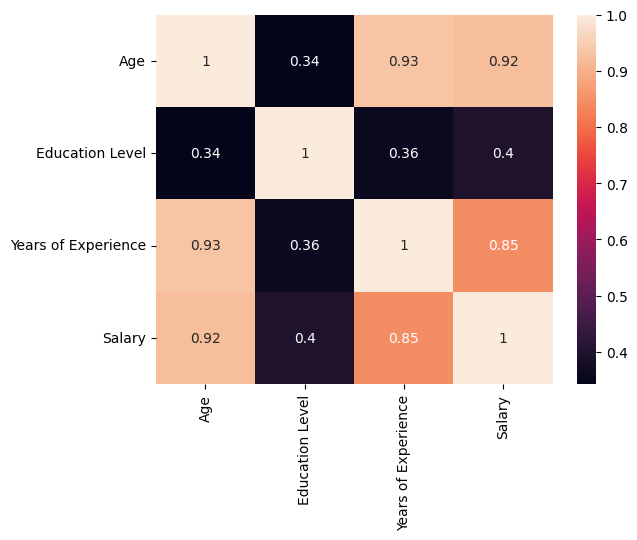

In [4]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Years of Experience', ylabel='Salary'>

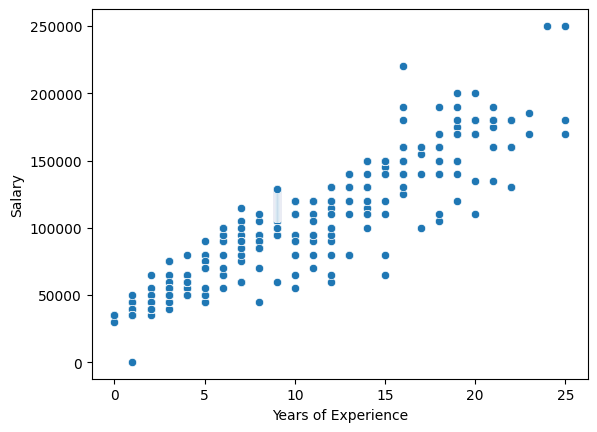

In [5]:
sns.scatterplot(df['Years of Experience'],df.Salary)

In [7]:
x=df['Years of Experience']
y=df['Salary']

<AxesSubplot: xlabel='Years of Experience', ylabel='Salary'>

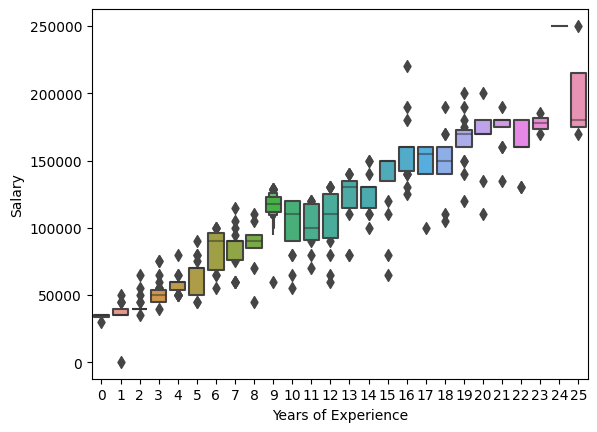

In [8]:
sns.boxenplot(x,y)

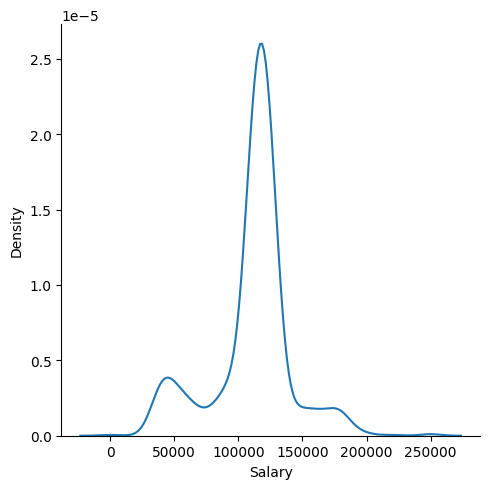

In [9]:
sns.displot(y,kind='kde')

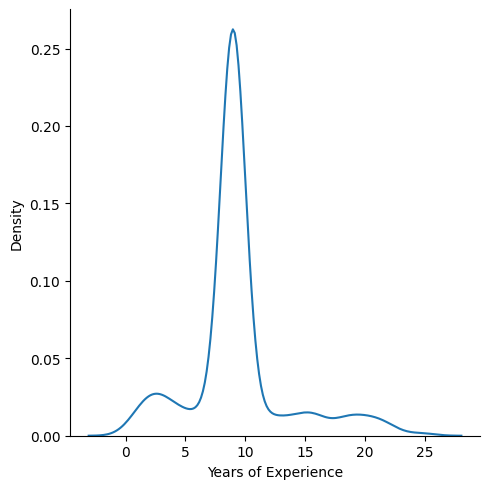

In [10]:
sns.displot(x,kind='kde')

* Data Spliting

In [11]:
x=df[['Years of Experience']]
y=df[['Salary']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)

(788, 1)
(197, 1)


# linear Regression

In [14]:
lm=LinearRegression()
model_l=lm.fit(x_train,y_train)

print('intercept:',model_l.intercept_)
print('Coefficient:',model_l.coef_,'\n')

print('R2_square',r2_score(model_l.predict(x_test),y_test))
print('RMSE:',np.sqrt(mean_squared_error(model_l.predict(x_test),y_test)))


intercept: [50224.9465376]
Coefficient: [[6502.57316126]] 

R2_square 0.554477323639196
RMSE: 16724.798898195742


# Polynomial Regession

* Polynomial Without Training

In [15]:
poly=PolynomialFeatures(degree=10)
x_poly=poly.fit_transform(df[['Years of Experience']])
lm=LinearRegression()
model1=lm.fit(x_poly,y)


print('intercept:',model1.intercept_)
print('Coefficient:',model1.coef_,'\n')

print('R2_square',r2_score(model1.predict(x_poly),y))
print('RMSE:',np.sqrt(mean_squared_error(model1.predict(x_poly),y)))


intercept: [36961.52729802]
Coefficient: [[ 0.00000000e+00 -3.47637538e+04  5.15546780e+04 -2.65060009e+04
   6.97617093e+03 -1.04119760e+03  9.32914621e+01 -5.11635376e+00
   1.68181858e-01 -3.04257894e-03  2.32926541e-05]] 

R2_square 0.79928840264464
RMSE: 12746.931970497773


* Polynomial With Training

In [16]:
poly=PolynomialFeatures(degree=10)
x_train_poly=poly.fit_transform(pd.DataFrame(x_train))
x_test_poly=poly.transform(pd.DataFrame(x_test))


lm=LinearRegression()
model2=lm.fit(x_train_poly,y_train)

print('intercept:',model2.intercept_)
print('Coefficient:',model2.coef_,'\n')

print('R2_square',r2_score(model2.predict(x_test_poly),y_test))
print('RMSE:',np.sqrt(mean_squared_error(model2.predict(x_test_poly),y_test)))


intercept: [37147.25412962]
Coefficient: [[ 0.00000000e+00 -3.21507471e+04  4.93813914e+04 -2.58304336e+04
   6.88702784e+03 -1.03861773e+03  9.38876770e+01 -5.18937815e+00
   1.71771251e-01 -3.12671363e-03  2.40660884e-05]] 

R2_square 0.7818955573682126
RMSE: 12187.365606307107


* Plots 

Text(0.5, 1.0, 'Polynomial With Training')

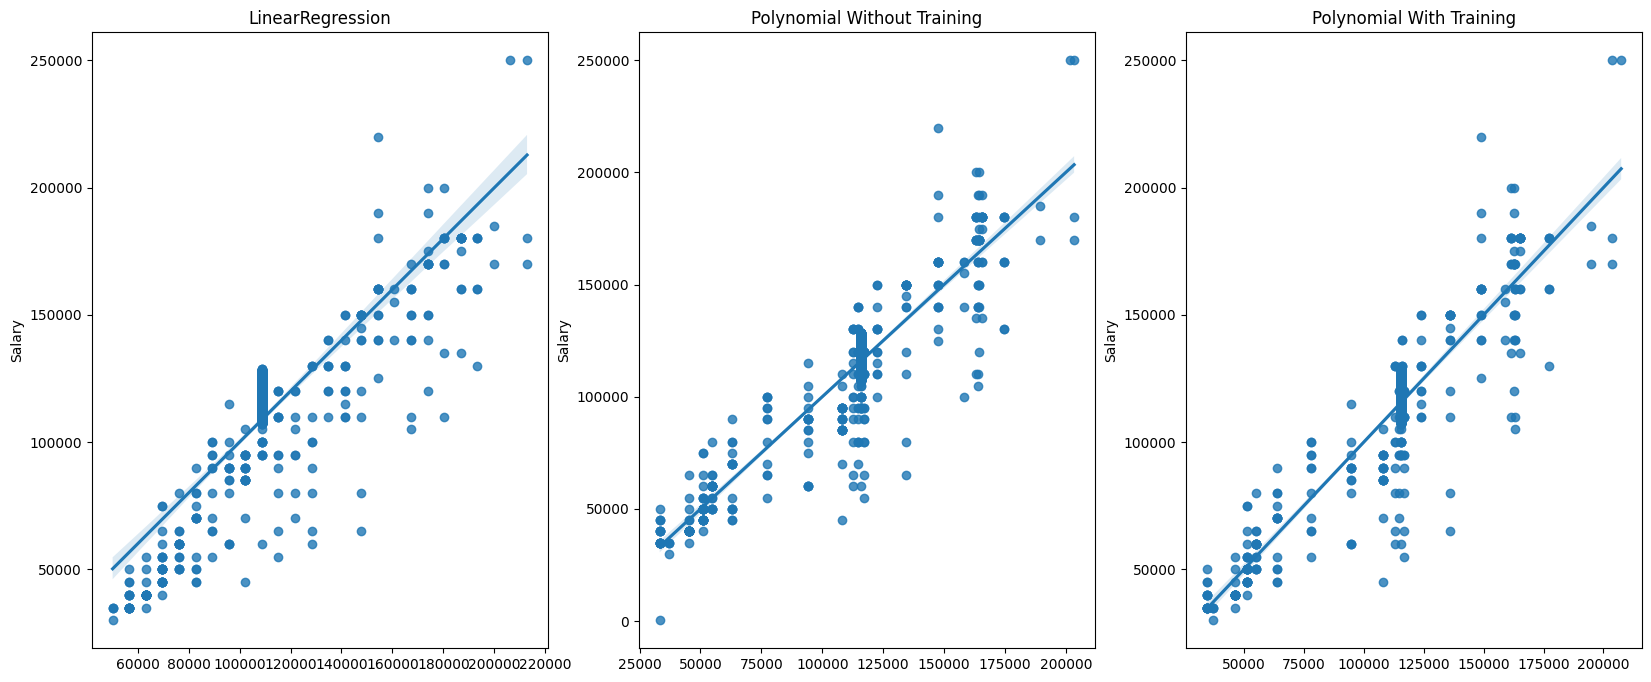

In [17]:
fig, axes =plt.subplots(1,3,figsize=(20,8))
sns.regplot(model_l.predict(x_train),y_train,ax=axes[0])
axes[0].set_title('LinearRegression')

sns.regplot(model1.predict(x_poly),y,ax=axes[1])
axes[1].set_title('Polynomial Without Training')

sns.regplot(model2.predict(x_train_poly),y_train,ax=axes[2])
axes[2].set_title('Polynomial With Training')


* Data Spliting for 3D

In [18]:
X=df[['Education Level','Years of Experience']]
Y=df[['Salary']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


# Multiple Linear Regression

In [19]:
lm=LinearRegression()
model_ml=lm.fit(X_train,Y_train)

print('intercept:',model_ml.intercept_)
print('Coefficient:',model_ml.coef_,'\n')

print('R2_square',r2_score(model_ml.predict(X_test),Y_test))
print('RMSE:',np.sqrt(mean_squared_error(model_ml.predict(X_test),Y_test)))


intercept: [50335.66508805]
Coefficient: [[4995.77513248 6199.13491981]] 

R2_square 0.5712684588529795
RMSE: 16754.304051575935


# 3D Polynomial Regression

* 3D Polynomial Without training

In [23]:
poly=PolynomialFeatures(degree=7)
X_poly=poly.fit_transform(df[['Education Level','Years of Experience']])
lm=LinearRegression()
model_1=lm.fit(X_poly,Y)


print('intercept:',model_1.intercept_)
print('Coefficient:',model_1.coef_,'\n')

print('R2_square',r2_score(model_1.predict(X_poly),Y))
print('RMSE:',np.sqrt(mean_squared_error(model_1.predict(X_poly),Y)))


intercept: [25604.28405936]
Coefficient: [[-5.41825589e-03 -1.34338774e+04  2.44031754e+04 -1.26778489e+04
   1.41128879e+04 -1.43741017e+04 -1.11657866e+04  1.28255994e+04
  -3.68102688e+03  4.10909278e+03 -8.14166199e+03  1.02510224e+04
  -2.97670842e+03  3.76481708e+02 -5.18168216e+02 -2.09341283e+03
   5.10186848e+03 -1.56807148e+03  1.96710076e+02 -1.24876567e+01
   3.21663423e+01  1.00030855e+04 -5.19643944e+03  1.24920239e+03
  -1.62833200e+02  1.14107154e+01 -3.80677406e-01 -9.71634413e-01
   3.41960821e+04 -2.57930553e+04  6.88375014e+03 -8.81919724e+02
   5.92071205e+01 -2.07667995e+00  3.42571637e-02  1.14515942e-02]] 

R2_square 0.8471069797151853
RMSE: 11359.956846052663


* 3D Polymomial With Training 

In [22]:
poly=PolynomialFeatures(degree=7)
X_train_poly=poly.fit_transform(pd.DataFrame(X_train))
X_test_poly=poly.transform(pd.DataFrame(X_test))

lm=LinearRegression()
model_2=lm.fit(X_train_poly,Y_train)

print('intercept:',model_2.intercept_)
print('Coefficient:',model_2.coef_,'\n')

print('R2_square',r2_score(model_2.predict(X_test_poly),Y_test))
print('RMSE:',np.sqrt(mean_squared_error(model_2.predict(X_test_poly),Y_test)))



intercept: [28054.58117905]
Coefficient: [[ 2.09442119e-03 -1.30601268e+04  2.14464385e+04 -1.23918447e+04
   1.47861142e+04 -1.27655052e+04 -1.10552859e+04  1.35893762e+04
  -4.28718865e+03  3.71656645e+03 -8.38216832e+03  1.11959003e+04
  -3.60169092e+03  5.26257467e+02 -4.70242471e+02 -3.03593319e+03
   6.40894854e+03 -2.23069547e+03  3.42285203e+02 -2.84507125e+01
   2.91087238e+01  7.65653707e+03 -3.16495502e+03  5.11295451e+02
  -2.56593230e+01 -2.58877014e+00  4.24679427e-01 -8.74405340e-01
   2.90414776e+04 -2.23127621e+04  5.99527728e+03 -7.61548373e+02
   4.91350181e+01 -1.54156183e+00  1.74052758e-02  1.02392764e-02]] 

R2_square 0.830127740215452
RMSE: 10992.296400943856


* Plots

Text(0.5, 1.0, 'Polynomial With Training')

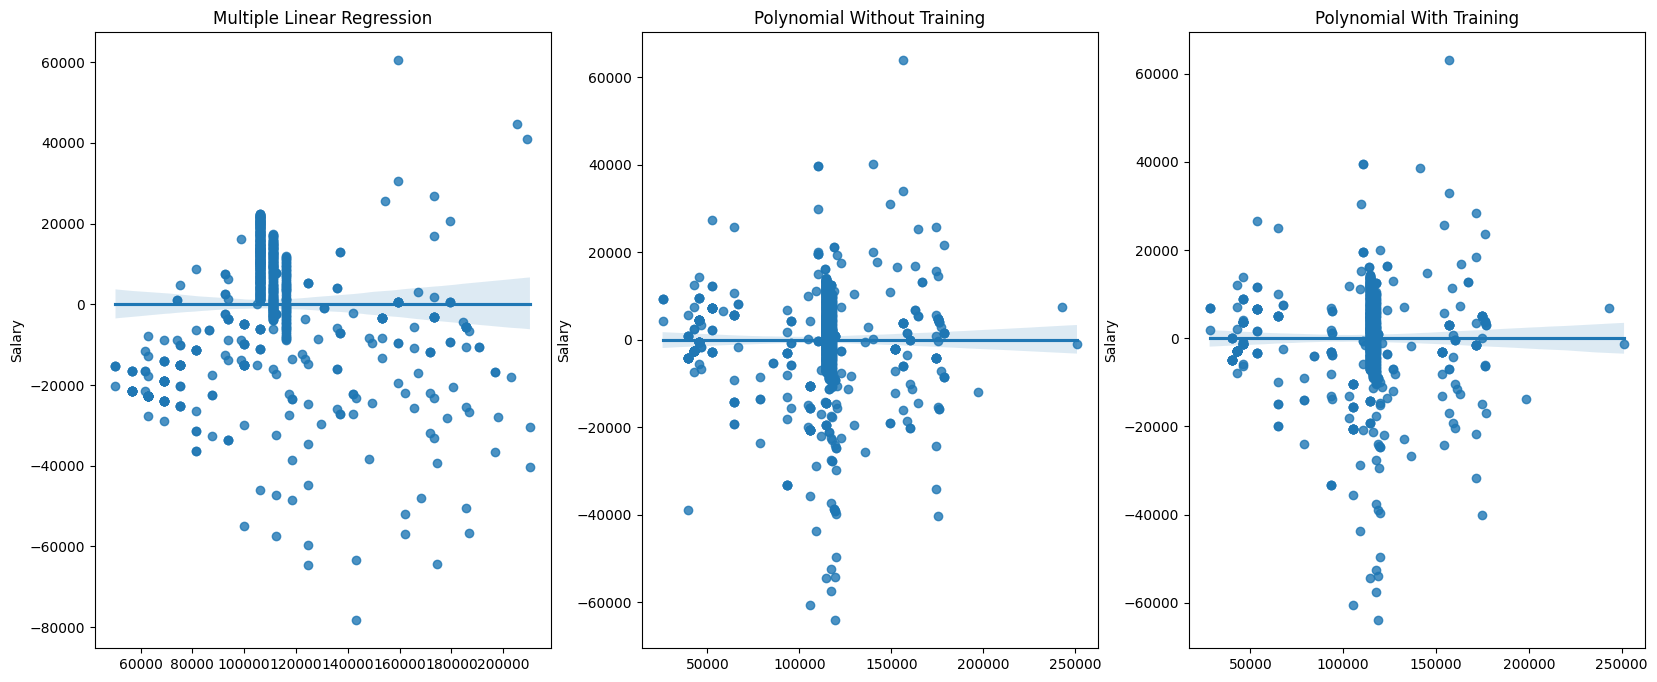

In [26]:
# Residual vs fitted Value
fig, axes =plt.subplots(1,3,figsize=(20,8))
y_pred_ml=model_ml.predict(X_train)
sns.regplot(y_pred_ml,(Y_train-y_pred_ml),ax=axes[0])
axes[0].set_title('Multiple Linear Regression')

y_pred_1=model_1.predict(X_poly)
sns.regplot(y_pred_1,(Y-y_pred_1),ax=axes[1])
axes[1].set_title('Polynomial Without Training')

y_pred_2=model_2.predict(X_train_poly)
sns.regplot(y_pred_2,(Y_train-y_pred_2),ax=axes[2])
axes[2].set_title('Polynomial With Training')